In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


# Die Binomialverteilung

In [2]:
import math
from math import comb
import random

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

Viele Anwendungen der Wahrscheinlichkeitsrechnung und Statistik betreffen die Wiederholung eines Experiments. Wir nennen jede Wiederholung einen **Versuch**, und wir sind besonders an Fällen interessiert, in denen das Experiment (jeder Versuch) **nur zwei mögliche Ergebnisse** hat: Erfolg oder Misserfolg, wahr oder falsch, $0$ oder $1$.

Um wiederholte Versuche eines Experiments mit zwei möglichen Ergebnissen zu analysieren, benötigen wir Kenntnisse über **Fakultäten**, **Binomialkoeffizienten** und **Bernoulli-Versuche**.

Auf der Grundlage dieser Voraussetzungen lernen wir die **Binomialverteilung** kennen, die eine **Wahrscheinlichkeitsverteilung** für die Anzahl der Erfolge in einer Folge von **Bernoulli-Versuchen** ist ({cite:p}`fahrmeirstatistik` s.213,s.289).

## Voraussetzungen

### Fakultät

Das Produkt der ersten $k$ positiven ganzen Zahlen wird als $k$-Faktultät bezeichnet und mit $k!$ abgekürzt ({cite:p}`fahrmeirstatistik` s.186).

$$k! = k \times (k - 1) \times ...\times 2 \times  1$$

Wir definieren auch $0!=1$.

Betrachten wir ein einfaches Beispiel und berechnen die Fakultät von $6$. Wenn wir die obige Gleichung einsetzen, erhalten wir folgendes Ergebnis

$$6! = 6 \times  5 \times  4 \times  3 \times  2 \times 1$$

In Python können wir das entweder direkt berechnen...

In [3]:
6 * 5 * 4 * 3 * 2 * 1

720

...oder wir verwenden die eingebaute Funktion `factorial()`

In [4]:
math.factorial(6)

720

### Binomialkoeffizienten

Wenn $n$ eine positive ganze Zahl und $k$ eine nicht negative ganze Zahl kleiner oder gleich $n$ ist, dann ist der <a href="https://de.wikipedia.org/wiki/Binomialkoeffizient">Binomialkoeffizient</a> ${n \choose k}$ definiert als:

$${n \choose k}= \frac{n!}{k!(n - k)!}$$

Die Binomialkoeffizienten ${n \choose k}$ werden oft als "$n$ über $k$" gelesen, weil es ${n \choose k}$ Möglichkeiten gibt, $k$ Elemente ohne Rücksicht auf ihre Reihenfolge aus einer Menge von $n$ Elementen auszuwählen. Mit anderen Worten: Die Binomialkoeffizienten beziehen sich auf die Anzahl der Kombinationen von $n$ Dingen, die $k$-mal ohne Wiederholung ausgewählt werden. Bitte beachten Sie, dass die Reihenfolge der Auswahl keine Rolle spielt.

Versuchen wir es mit einem Beispiel, um ein Gefühl dafür zu bekommen.

Nehmen wir ein einfaches Wort wie "dog", das drei verschiedene Buchstaben enthält: d, o, g. Wie viele Möglichkeiten gibt es, genau einen Buchstaben aus diesen $3$ Buchstaben zu ziehen? Mit Sicherheit gibt es $3$ Möglichkeiten, genau einen Buchstaben zu zeichnen: "d", "o", oder "g". Wir können also alle Kombinationen als ${3 \choose 1}$ schreiben. Was ist mit zwei Buchstaben? Wie viele Kombinationen gibt es, um genau zwei Buchstaben aus $3$ Buchstaben zu ziehen? Die Kombinationen sind "do", "dg" und "og" (Bitte beachten Sie, dass z.B. "og" und "go" nur als eine Kombination gezählt werden, da die Reihenfolge im Moment keine Rolle spielt). Dementsprechend ist die Antwort $3$, die als ${3 \choose 2}$ geschrieben werden kann. Eine letzte Frage: Wie viele Kombinationen gibt es, um aus $3$ Buchstaben genau drei Buchstaben zu ziehen? Fragen wir Python!

Zunächst wenden wir einen naiven Ansatz an, indem wir die obige Formel anwenden.

In [5]:
# n entspricht 3 Buchstaben von dog
n = 3
# k entspricht wir ziehen 3 Buchstaben
k = 3
math.factorial(n) / ((math.factorial(k) * math.factorial(n - k)))

1.0

Wir können aber auch die eingebaute Funktion `comb()` verwenden, um die Anzahl der Kombinationen zu berechnen. Wir machen das für $k=1,2,3$.

In [6]:
# 3 über 1
comb(3, 1)

3

In [7]:
# 3 über 2
comb(3, 2)

3

In [8]:
# 3 über 3
comb(3, 3)

1

Nun, da wir mit dem Konzept vertraut sind, wollen wir ein komplexeres Beispiel betrachten: Die SRH Hochschule bittet alle Absolventen, ihre $4$ Lieblingskurse aus dem Studienplan zu wählen. Wie viele verschiedene Antworten könnten die Studierenden geben, wenn der Studienplan $24$ Kurse zur Auswahl anbietet? Irgendwelche Vermutungen? Lassen Sie uns Python fragen!

In [9]:
comb(24, 4)

10626

Die Studenten können $10.626$ verschiedene Antworten geben.

### Bernoulli-Versuche

Wiederholte Versuche eines Experiments werden als **Bernoulli-Versuche** bezeichnet, wenn die folgenden drei Bedingungen erfüllt sind:

1. Das Experiment (jeder Versuch) hat zwei mögliche Ergebnisse, die mit $s$ für Erfolg und $f$ für Misserfolg bezeichnet werden.
2. Die Versuche sind unabhängig voneinander.
3. Die Wahrscheinlichkeit für einen Erfolg, die als Erfolgswahrscheinlichkeit bezeichnet wird und mit $p$ bezeichnet wird, bleibt von Versuch zu Versuch gleich.

## Die Binomialverteilung

Die Binomialverteilung ist die **Wahrscheinlichkeitsverteilung** für die Anzahl der Erfolge in einer Folge von **Bernoulli-Versuchen** ({cite:p}`Papula2011` s.350).

### Die binomische Wahrscheinlichkeitsformel

Bei $n$ Bernoulli-Versuchen ist die Anzahl der Ergebnisse, die genau $x$ Erfolge enthalten, gleich dem Binomialkoeffizienten ${n \choose x}$ ({cite:p}`fahrmeirstatistik` s.188).

$X$ sei die Gesamtzahl der Erfolge in $n$ Bernoulli-Versuchen mit der Erfolgswahrscheinlichkeit $p$. Dann ist die Wahrscheinlichkeitsverteilung der Zufallsvariablen $X$ gegeben durch:

$$P(X = x) = {n \choose x}p^x(1 - p)^{n-x}, \qquad x = 0, 1, 2, \dots , n$$

Die Zufallsvariable $X$ wird als **Binomialzufallsvariable** bezeichnet und folgt der Binomialverteilung mit den Parametern $n$ und $p$ ({cite:p}`Papula2011` s.356).

Betrachten wir ein Beispiel aus der realen Welt.

Langzeitstatistiken besagen, dass die Chance, die Abschlussprüfung in Statistik zu bestehen, bei $0,3$ liegt. Ja, etwa $70 \%$ der Studenten fallen in der Statistikprüfung durch! Übrigens, wenn Sie dieses E-Learning-Modul absolvieren, werden Ihre Chancen, die Abschlussprüfung zu bestehen, definitiv steigen :-)

Betrachten wir eine Klasse mit $25$ Studenten. Wie hoch ist die Wahrscheinlichkeit, dass genau $3$ der Studenten dieser Klasse die Abschlussprüfung in Statistik bestehen werden? Oder anders ausgedrückt: $P(X=3)$. Auch hier beginnen wir mit der Implementierung eines naiven Ansatzes in Python.

In [10]:
# Anzahl der Studenten
n = 25
# Erfolgswahrscheinlichkeit
p = 0.3
# Anzahl der Studenten die die Prüfung bestehen
k = 3

math.comb(n, k) * p ** (k) * (1 - p) ** (n - k)

0.02427998871170032

Wow, die Wahrscheinlichkeit, dass genau $3$ von $25$ Studierenden $(P(X=3))$ die Abschlussprüfung in Statistik bestehen, ist ziemlich gering. Wie sieht es mit der Wahrscheinlichkeit aus, dass genau $15$ von $25$ Studierenden $(P(X=15))$ die Abschlussprüfung in Statistik bestehen werden? Wir wenden uns an Python.

In [11]:
# Anzahl der Studenten
n = 25
# Erfolgswahrscheinlichkeit
p = 0.3
# Anzahl der Studenten die die Prüfung bestehen
k = 15

math.comb(n, k) * p ** (k) * (1 - p) ** (n - k)

0.0013248974242351928

Die Wahrscheinlichkeit von $P(X=15)$ beträgt etwa $0,1 \%$. Wir könnten mit unseren Experimenten fortfahren, um alle Wahrscheinlichkeiten für **genau ein Ergebnis** für $k=0,1,2, \dots ,n$ herauszufinden. Bitte beachten Sie allerdings, dass es für unser spezielles Beispiel nicht sehr informativ ist, die Wahrscheinlichkeit für das Bestehen der Prüfung für genau eine bestimmte Anzahl $(k)$ von Studenten zu kennen. Für uns ist es von größerem Informationsinteresse, wenn wir die Frage beantworten könnten, wie hoch die Wahrscheinlichkeit ist, dass $k$ oder weniger Studierende $(P(X \le k))$ die Prüfung bestehen, oder, was ebenso interessant ist, dass $k$ oder mehr Studierende $(P(X \ge k))$ die Prüfung bestehen.

Als Übung wenden wir uns an Python und bestimmen die Wahrscheinlichkeit, dass $9$ oder weniger Studierende die Abschlussprüfung in Statistik bestehen $(P(X \le 9))$. Wir interessieren uns also für die Wahrscheinlichkeit, dass $0$ von $25 \ $,$ \ 1$ von $25 \ $,$ \ 2$ von $25 \ $,$ \ ...$ oder $9$ von $25$ Studierenden die Prüfung bestehen. Um diese Wahrscheinlichkeit zu berechnen, können wir unseren naiven Ansatz erweitern und Folgendes berechnen

$P(X = 0)+P(X = 1)+P(X = 2)+ \dots+P(X = 9)$

In [12]:
# Anzahl der Studenten
n = 25
# Erfolgswahrscheinlichkeit
p = 0.3
# Anzahl der maximalen Erfolge
k = 9

prob = 0
prob_total = 0

# Erzeuge for-loop
for i in range(k + 1):
    prob = math.comb(n, i) * p ** (i) * (1 - p) ** (n - i)
    prob_total += prob
prob_total

0.8105639764950532

Die Wahrscheinlichkeit, dass $9$ oder weniger Studierende die Statistikprüfung bestehen $(P(X≤9))$, beträgt $81,1 \%$. Das wiederum bedeutet, dass die Wahrscheinlichkeit, dass $10$ oder mehr Studierende die Prüfung bestehen, $P(X>9)=1-P(X≤9)$ oder nur $18,9 \%$ beträgt.

Neben der ehrlich gesagt recht unangenehmen Einsicht in die Statistik des Bestehens der Abschlussprüfung ist es klar, dass die naive Implementierung von oben ziemlich mühsam ist. Deshalb führen wir die eingebauten Funktionen `binom.pmf()` und `binom.cdf()` ein.

Die Verwendung von `binom.pmf()` ist wie folgt: `binom.pmf(k, n, p, loc)`. Wir lassen vorerst das Argument `loc` außer Acht. Somit vereinfacht sich die Funktion `binom.pmf()` zu `binom.pmf(k, n, p)`, wobei $k$ den insgesamten Erfolgen, $n$ der Gesamtanzahl und $p$ der Wahrscheinlichkeit für das Bestehen der Prüfung entspricht. Um zu überprüfen, ob die Funktion `binom.pmf()` wie erwartet funktioniert, erinnern wir uns an unsere Testbeispiele von oben, nämlich $P(X=3)$ und $P(X=15)$.

In [13]:
binom.pmf(3, 25, 0.3)

0.024279988711700378

In [14]:
binom.pmf(15, 25, 0.3)

0.0013248974242351943

Vergleichen Sie diese Ergebnisse mit den Ergebnissen unserer naiven Implementierung (scrollen Sie nach oben). Die Zahlen sollten übereinstimmen.

Die Funktion `binom.pmf()`  ist sehr praktisch, wenn wir Wahrscheinlichkeiten akkumulieren wollen, wie z. B. $P(X≤x)$ oder $P(X>x)$, denn wir können eine for - Schleife für das Argument $x$ angeben und anschließend summieren. Betrachten wir das Beispiel von oben $(P(X≤9))$.

In [15]:
P_le9 = []
for i in range(10):
    P_le9.append(binom.pmf(i, 25, 0.3))
P_le = sum(P_le9)
P_le

0.8105639764950541

Eine weitere eingebaute Funktion, die für die Beantwortung von $P(X≤9)$ geeignet ist, ist die Funktion `binom.pdf()`, die die Verteilungsfunktion zurückgibt. Die Funktion `binom.cdf()` berechnet die kumulative Wahrscheinlichkeitsverteilung und ist insofern praktisch, da wir auf den Aufruf der Summenfunktion verzichten können. Die Verwendung von `binom.cdf()` ist wie folgt: 

`binom.cdf(k, n, p, loc)`. Auch hier lassen wir das Argument `loc` außer Acht und belassen es bei `binom.cdf(k, n, p)`. Zusätzlich zu den Argumenten der Funktion `binom.cdf()` gilt zu beachten, dass `binom.cdf()`  die Wahrscheinlichkeiten $P(X≤x)$ wiedergibt und `binom.sf(k, n, p)` $P(X>x)$ die Gegenwahrscheinlichkeit `1-binom.cdf()`.

Um dies zu verdeutlichen, lassen Sie uns $P(X≤9)$ neu berechnen. Das Ergebnis der obigen Berechnung war $0,81056$. Nun wenden wir die Funktion `binom.cdf()` an, um das gleiche Ergebnis zu erhalten.

In [16]:
binom.cdf(9, 25, 0.3)

0.8105639764950546

Um $P(X>9)$ zu erhalten, was dasselbe ist wie $1-P(X≤9)$, setzen wir das Argument

In [17]:
binom.sf(9, 25, 0.3)

0.18943602350494537

In [18]:
1 - binom.cdf(9, 25, 0.3)

0.18943602350494537

Um die **binomische Wahrscheinlichkeitsverteilung** zu visualisieren, verwenden wir die Funktion `binom.rvs()`, die Zufallsabweichungen für eine Binomialverteilung erzeugt, die durch ihre Größe $n$ und die Erfolgs-/Misserfolgswahrscheinlichkeit $p$ definiert ist.

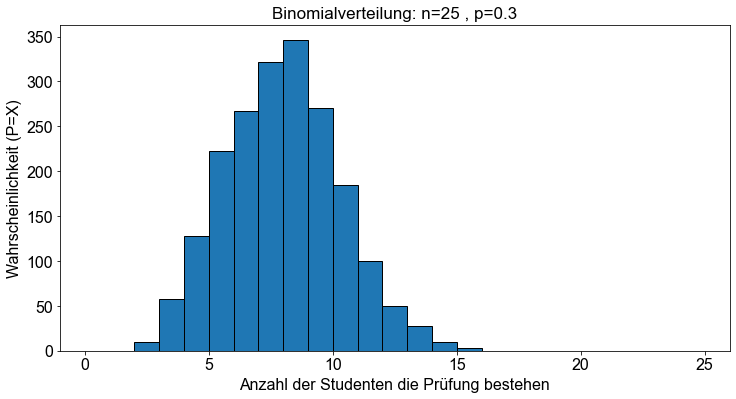

In [19]:
# Setze random seed für Reproduzierbarkeit
np.random.seed(seed=42)

# Erzeuge y-Werte der Binomialverteilung
n = 25
p = 0.3
y = binom.rvs(n, p, size=2000)

# Erzeuge Plot
fig, ax = plt.subplots()
ax.set_xlim(-1, 26)
ax.set_title(f"Binomialverteilung: n={n} , p={p}")
ax.set_xlabel("Anzahl der Studenten die Prüfung bestehen")
ax.set_ylabel("Wahrscheinlichkeit (P=X)")
bins = max(y) - min(y)
_ = ax.hist(y, bins, edgecolor="k")

Zusätzlich visualisieren wir die oben diskutierten Wahrscheinlichkeiten: $P(X=3), P(X=15), P(X≤9), P(X>9)$ und die entsprechende **kumulative binomiale Wahrscheinlichkeitsverteilungsfunktion**.

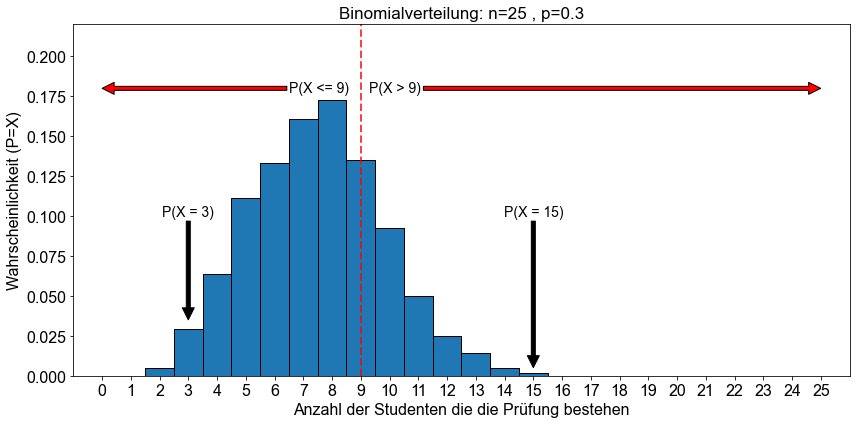

In [20]:
# Setze random seed für Reproduzierbarkeit
np.random.seed(seed=42)

# Erzeuge y-Werte der Binomialverteilung
n = 25
p = 0.3
y = binom.rvs(n, p, size=2000)

fig, ax = plt.subplots()
ax.set_xlim(-1, 26)
ax.set_ylim(0, 0.22)
ax.set_title(f"Binomialverteilung: n={n} , p={p}")
ax.set_xlabel("Anzahl der Studenten die die Prüfung bestehen")
ax.set_ylabel("Wahrscheinlichkeit (P=X)")
bins = max(y) - min(y)
ax.hist(y, bins, edgecolor="k", density=True, align="left")
ax.axvline(9, color="red", lw=2, linestyle="--", alpha=0.75)
ax.set_xticks(range(26))
# Annotation
ax.annotate(
    "P(X > 9)",
    xy=(25, 0.18),
    xycoords="data",
    xytext=(9.3, 0.18),
    textcoords="data",
    arrowprops=dict(facecolor="red", shrink=0.0005),
    verticalalignment="center",
    size=14,
)
ax.annotate(
    "P(X <= 9)",
    xy=(0, 0.18),
    xycoords="data",
    xytext=(6.5, 0.18),
    textcoords="data",
    arrowprops=dict(facecolor="red", shrink=0.0005),
    verticalalignment="center",
    size=14,
)
ax.annotate(
    "P(X = 15)",
    xy=(15, 0.005),
    xycoords="data",
    xytext=(15, 0.1),
    textcoords="data",
    arrowprops=dict(facecolor="black", shrink=0.0005),
    horizontalalignment="center",
    size=14,
)
ax.annotate(
    "P(X = 3)",
    xy=(3, 0.035),
    xycoords="data",
    xytext=(3, 0.1),
    textcoords="data",
    arrowprops=dict(facecolor="black", shrink=0.0005),
    horizontalalignment="center",
    size=14,
)

fig.tight_layout()

Text(1.5, 0.85, 'P(X <= 9) = 0.81)')

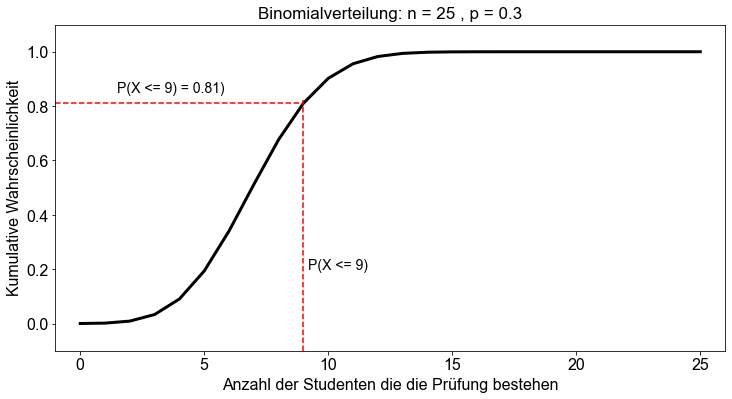

In [21]:
# Erzeuge x und y Werte für kumulitative Wahrscheinlichkeit
fig, ax = plt.subplots()

x = np.linspace(0, 25, num=26)
cdf = binom.cdf(x, n, p)
ax.plot(x, cdf, color="k", linewidth=3)

ax.set_xlim(-1, 26)
ax.set_ylim(-0.1, 1.1)
ax.set_title(f"Binomialverteilung: n = {n} , p = {p}")
ax.set_xlabel("Anzahl der Studenten die die Prüfung bestehen")
ax.set_ylabel("Kumulative Wahrscheinlichkeit")

ax.axvline(x=9, ymin=0, ymax=binom.cdf(9, n, p) * 0.95, color="red", linestyle="dashed")
ax.axhline(
    y=binom.cdf(9, n, p),
    xmin=0,
    xmax=9 / 24.5,
    color="red",
    linestyle="dashed",
)

# Annotations
ax.annotate(
    "P(X <= 9)",
    xy=(9.2, 0.2),
    xycoords="data",
    xytext=(9.2, 0.2),
    textcoords="data",
    size=14,
)
ax.annotate(
    "P(X <= 9) = 0.81)",
    xy=(1.5, 0.85),
    xycoords="data",
    xytext=(1.5, 0.85),
    textcoords="data",
    size=14,
)

Zum Abschluss dieses Abschnitts und um Ihnen ein Gefühl für die Formen der verschiedenen binomischen Wahrscheinlichkeitsverteilungen zu vermitteln, werden im Folgenden drei verschiedene binomische Wahrscheinlichkeitsverteilungen und die entsprechenden kumulativen binomischen Beweisbarkeitsverteilungen für $p=0,1, p=0,5$ und $p=0,9$ angegeben.

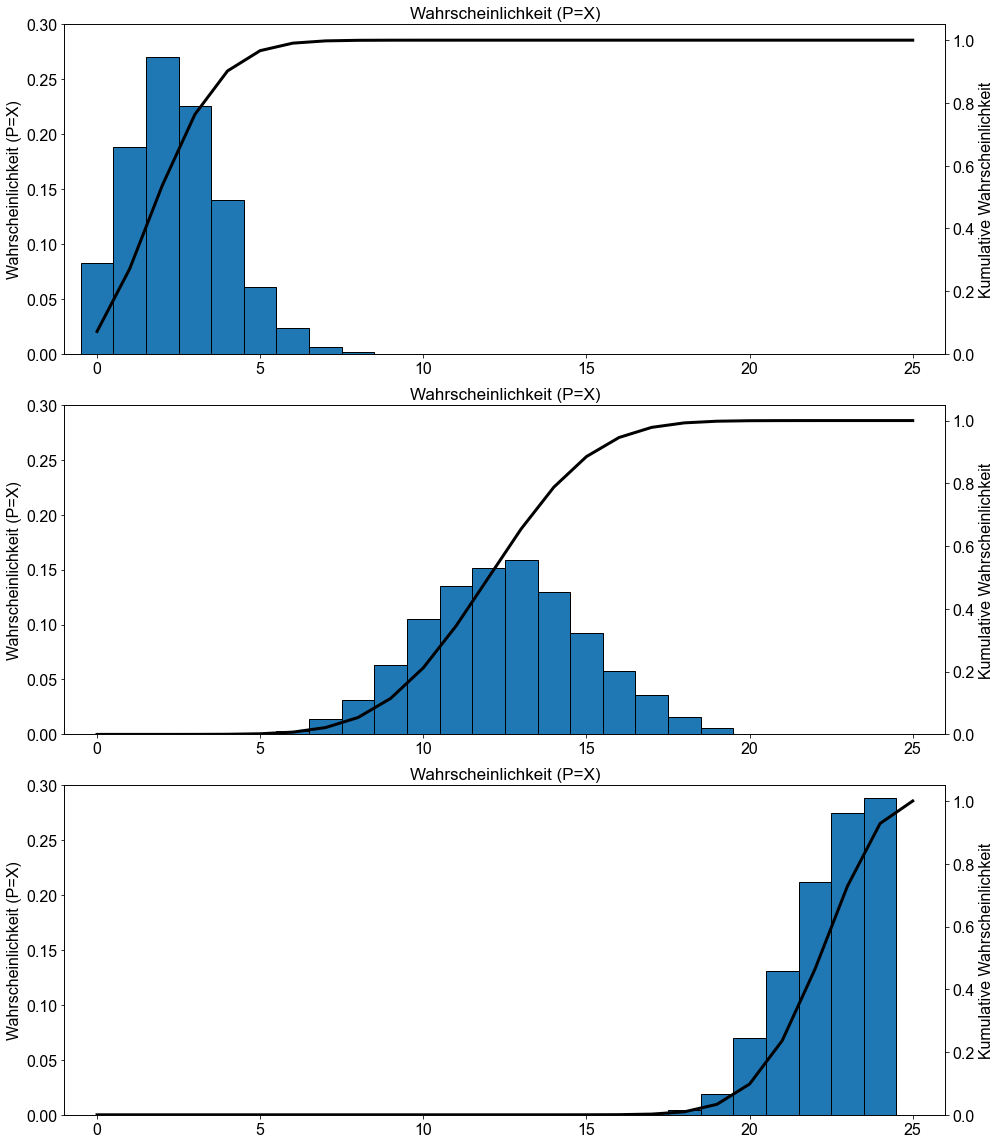

In [22]:
fig, ax = plt.subplots(nrows=3, figsize=(14, 16))
x = np.linspace(0, 25, num=26)
for e, p in enumerate([0.1, 0.5, 0.9]):
    y = binom.rvs(n, p, size=2000)
    bins = max(y) - min(y)
    ax[e].hist(y, bins, edgecolor="k", density=True, align="left")
    ax[e].set_ylabel("Wahrscheinlichkeit (P=X)")
    ax[e].set_title("Wahrscheinlichkeit (P=X)")
    ax[e].set_xlim(-1, 26)
    ax[e].set_ylim(0, 0.30)
    # zweite Y-Achse
    ax2 = ax[e].twinx()
    cdf = binom.cdf(x, n, p)
    ax2.plot(x, cdf, color="k", linewidth=3)
    ax2.set_ylabel("Kumulative Wahrscheinlichkeit")
    ax2.set_ylim(0, 1.05)
fig.tight_layout()

## Mittelwert und Standardabweichung einer binomialen Zufallsvariable
----------------------------------------

Der Mittelwert und die Standardabweichung einer binomialen Zufallsvariablen mit den Parametern $n$ und $p$ sind jeweils

$$\mu = np$$

und

$$\sigma = np(1 - p)\text{,}$$

Erinnern wir uns an das Beispiel aus dem vorherigen Abschnitt. Die Wahrscheinlichkeit, die statistische Abschlussprüfung zu bestehen, beträgt $0,3$. Wir betrachten eine Klasse mit $25$ Studenten. Die Zufallsvariable $X$, die dem Erfolg in der Prüfung entspricht, ist eine binomiale Zufallsvariable und folgt einer Binomialverteilung mit den Parametern $n=25$ und $p=0,3$. Somit können der Mittelwert μ und die Standardabweichung $\sigma$ wie folgt berechnet werden:

$$\mu = np = 25 \times 0,3 = 7,5$$

und

$$\sigma = np(1 - p) = 25 \times 0,3 \times (1-0,3) = 5,25$$

Die folgende Grafik zeigt die Binomialverteilung mit den Parametern $n=25$ und $p=0,3$ sowie deren Mittelwert $\mu$ und Standardabweichung $\sigma$.

Text(13.25, 0.2, '$+\\sigma$')

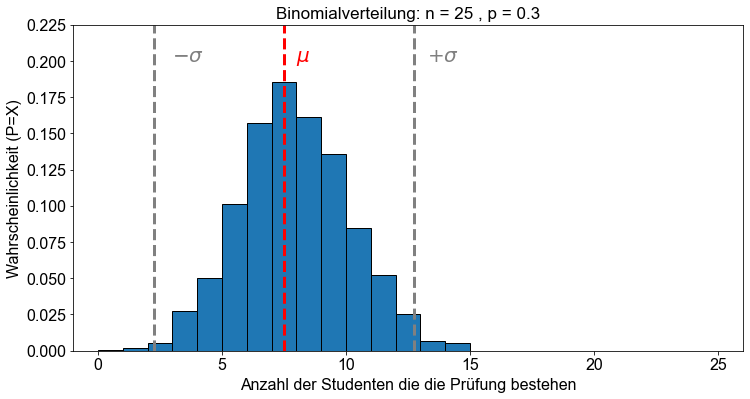

In [23]:
n = 25
p = 0.3
y = binom.rvs(n, p, size=2000)
mu = n * p
sigma = n * p * (1 - p)

fig, ax = plt.subplots()
bins = max(y) - min(y)
ax.hist(y, bins, edgecolor="k", density=True)

ax.set_ylim(0, 0.225)
ax.set_xlim(-1, 26)
ax.set_title(f"Binomialverteilung: n = {n} , p = {p}")
ax.set_xlabel("Anzahl der Studenten die die Prüfung bestehen")
ax.set_ylabel("Wahrscheinlichkeit (P=X)")

ax.axvline(mu, color="red", linewidth=3, linestyle="dashed")
ax.axvline(mu - sigma, color="grey", linewidth=3, linestyle="dashed")
ax.axvline(mu + sigma, color="grey", linewidth=3, linestyle="dashed")
# Annotation
ax.annotate("$\mu$", color="r", fontsize=20, xy=(7.5, 0.2), xytext=(8, 0.2))
ax.annotate("$-\sigma$", color="grey", fontsize=20, xy=(2.5, 0.2), xytext=(3, 0.2))
ax.annotate(
    "$+\sigma$", color="grey", fontsize=20, xy=(12.75, 0.2), xytext=(13.25, 0.2)
)

## Binomiale Approximation der hypergeometrische Verteilung

Häufig möchte man den Anteil (Prozentsatz) der Mitglieder einer endlichen Grundgesamtheit bestimmen, die ein bestimmtes Attribut aufweisen. Im Allgemeinen ist die betrachtete Grundgesamtheit zu groß, als dass der Grundgesamtheitsanteil durch eine Zählung ermittelt werden könnte. Nehmen wir an, dass eine einfache Zufallsstichprobe des Umfangs $n$ aus einer Grundgesamtheit entnommen wird, in der der Anteil der Mitglieder, die ein bestimmtes Merkmal aufweisen, $p$ ist. Dann ist eine Zufallsvariable von primärer Bedeutung für die Schätzung von $p$ die Anzahl der Mitglieder der Stichprobe, die das bestimmte Merkmal aufweisen, die wir als $X$ bezeichnen.Die genaue Wahrscheinlichkeitsverteilung von $X$ hängt davon ab, ob die Stichprobe **mit** oder **ohne Ersetzung** durchgeführt wird. Wird die Stichprobe mit Ersetzung durchgeführt, handelt es sich um Bernoulli-Versuche: Jede Auswahl eines Mitglieds der Grundgesamtheit entspricht einem Versuch. Ein Versuch ist erfolgreich, wenn das in diesem Versuch ausgewählte Mitglied das angegebene Attribut aufweist; andernfalls ist er nicht erfolgreich. Die Versuche sind **unabhängig**, da die Stichprobe mit Ersetzung durchgeführt wird. Die Erfolgswahrscheinlichkeit bleibt von Versuch zu Versuch gleich, sie ist immer gleich dem Anteil der Grundgesamtheit, der das angegebene Merkmal aufweist. Daher hat die Zufallsvariable $X$ die **Binomialverteilung** mit den Parametern $n$ (der Stichprobenumfang) und $p$ (der Anteil der Grundgesamtheit) ({cite:p}`Papula2011` s.356).

In der Realität werden die Stichproben jedoch in der Regel **ohne Ersetzung** durchgeführt. Unter diesen Umständen handelt es sich bei dem Stichprobenverfahren nicht um Bernoulli-Versuche, da die Versuche **nicht unabhängig** sind und die Erfolgswahrscheinlichkeit von Versuch zu Versuch variiert. Mit anderen Worten: Die Zufallsvariable $X$ hat keine Binomialverteilung. Ihre Verteilung wird als <a href="https://de.wikipedia.org/wiki/Hypergeometrische_Verteilung">hypergeometrische Verteilung</a> bezeichnet ({cite:p}`Papula2011` s.364).

In der Praxis kann eine hypergeometrische Verteilung jedoch in der Regel durch eine Binomialverteilung angenähert werden. Der Grund dafür ist, dass es bei einem **Stichprobenumfang von nicht mehr als 5 % der Grundgesamtheit** kaum einen Unterschied zwischen einer Stichprobe mit und ohne Ersatz gibt ({cite:p}`Papula2011` s.365).

### Stichproben und die Binomialverteilung

Angenommen, eine einfache Zufallsstichprobe des Umfangs $n$ wird aus einer endlichen Grundgesamtheit entnommen, in der der Anteil der Mitglieder, die ein bestimmtes Merkmal aufweisen, $p$ ist. Dann hat die Anzahl der in der Stichprobe enthaltenen Mitglieder, die das bestimmte Merkmal aufweisen

- eine exakte Binomialverteilung mit den Parametern $n$ und $p$, wenn die Stichprobe mit Ersatz durchgeführt wird
- eine näherungsweise Binomialverteilung mit den Parametern $n$ und $p$ wenn die Stichprobenziehung ohne Ersetzung erfolgt und der Stichprobenumfang nicht mehr als $5 \%$ des Grundgesamtheitsumfangs beträgt ({cite:p}`Papula2011` s.365).

